# 🐶 end to end multi-class dog bread classification 
Using Tensorflow 2.0 and Tensorflow Hub

## 1. Problem
      Identifying breed of dog of given image
## 2. Data
## 3. Evaluation
## 4. Features

In [0]:
#!unzip "drive/My Drive/Colab Notebooks/dog-vision/dog-breed-identification.zip" -d "/content/drive/My Drive/Colab Notebooks/dog-vision"

### Get Workspace Ready

In [2]:
# Import Tensorflow into Colab
import tensorflow as tf
print("TF Version:",tf.__version__)

TF Version: 2.2.0


In [3]:
import tensorflow_hub as hub
print("TFnHub Version:",hub.__version__)

TFnHub Version: 0.8.0


In [4]:
print("GPU","Available" if tf.config.list_physical_devices("GPU") else "Not Available")

GPU Available


### Getting our data ready (Into Tensor)

In [5]:
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Colab Notebooks/dog-vision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


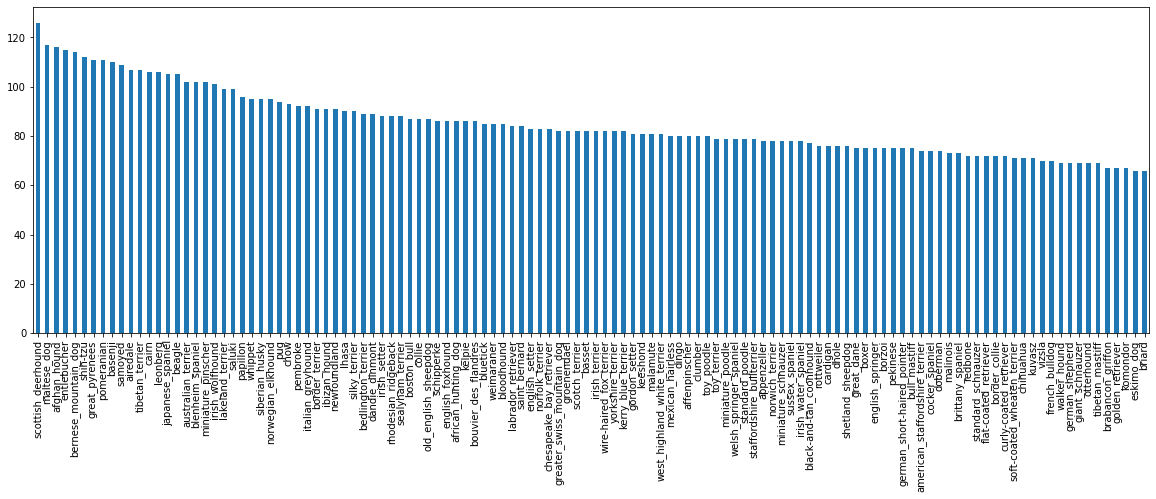

In [6]:
# Find out how many images are available of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,6));

In [7]:
# What's the median image per class?
labels_csv["breed"].value_counts().median()

82.0

In [0]:
# view an image
ipath = "drive/My Drive/Colab Notebooks/dog-vision"

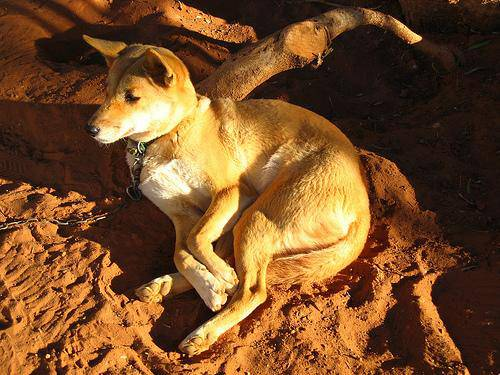

In [9]:
from IPython.display import Image
Image(ipath+"/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images and their label

In [10]:
# Create pathnames from image ids
filenames = [ipath + "/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['drive/My Drive/Colab Notebooks/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [11]:
# Check whether the number of files actually matches the list in lable file
import os
if len(os.listdir(ipath+"/train")) == len(filenames):
  print("Success")
else:
  print("mismatch")

Success


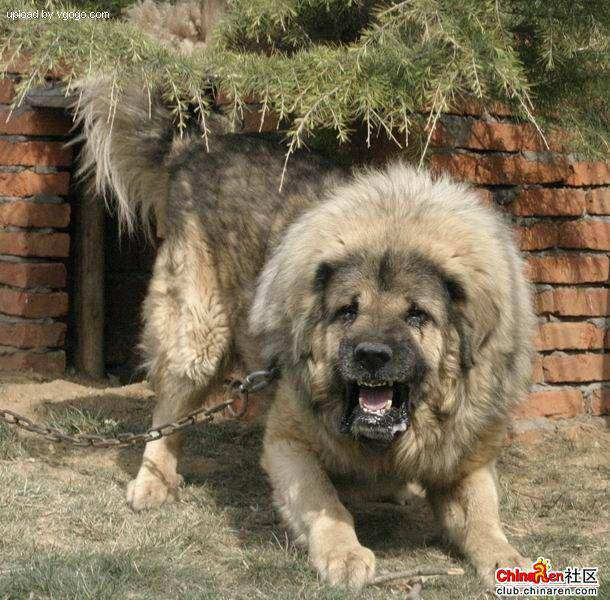

In [12]:
Image(filenames[9000])

In [13]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [16]:
# Check if the numbers of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Success")
else:
  print("Not Successfull")

Success


In [17]:
# Find the unique breed
unique_breed = np.unique(labels)
len(unique_breed)

120

In [18]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
# Turn a single label in array of booleans
print(labels[0])

boston_bull


In [20]:
labels[0] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
# Turn every lable into boolean array
boolean_labels = [label == unique_breed for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breed == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
filenames[:10]

['drive/My Drive/Colab Notebooks/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Create own validation set

In [0]:
# Setup X and y
X = filenames
y = boolean_labels

Experiment with 1000 images and then increase the size as per requirement

In [0]:
# Set number of images for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:11000,step:1000}

In [27]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [28]:
# Let have a look at training data
X_train[:5],y_train[:2]

(['drive/My Drive/Colab Notebooks/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Colab Notebooks/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Colab Notebooks/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Colab Notebooks/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Colab Notebooks/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

### Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image
Before we do, let's see what importing an image looks like.

In [29]:
# Convert images into numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [30]:
image.max(),image.min()

(255, 0)

In [31]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [32]:
# Convert image into a Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [0]:
# Define image size
IMG_SIZE = 224

def process_image(image_path,img_size = IMG_SIZE):
  """
  Takes mage path and turn it into Tensor
  """
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn the JPEG image into Tensor with 3 channels (RGB)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize image to our desired size (224)
  image = tf.image.resize(image,size = [IMG_SIZE,IMG_SIZE])

  return image


## Turning Data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image, label).

In [0]:
# Create a simple function that returns a tuple (image and label)
def get_image_lable(image_path,label):
  image = process_image(image_path)

  return image,label


In [0]:
# Define Batch Size = 32
BATCH_SIZE = 32

# Create function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False ):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths no label(so no `y`)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If data is valid data, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    # turn filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepath
                                              tf.constant(y))) # Labels
    data_batch = data.map(get_image_lable).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))
    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_lable)
    # Turn training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch




In [36]:
# Create training and data validation batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val, y_val,valid_data=True)


Creating training data batches...
Creating validation data batches...


In [37]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [0]:
import matplotlib.pyplot as plt

# Create a function for visualization of 25 images
def show_25_images(images, labels):
  plt.figure(figsize = (10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis("off");

In [39]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

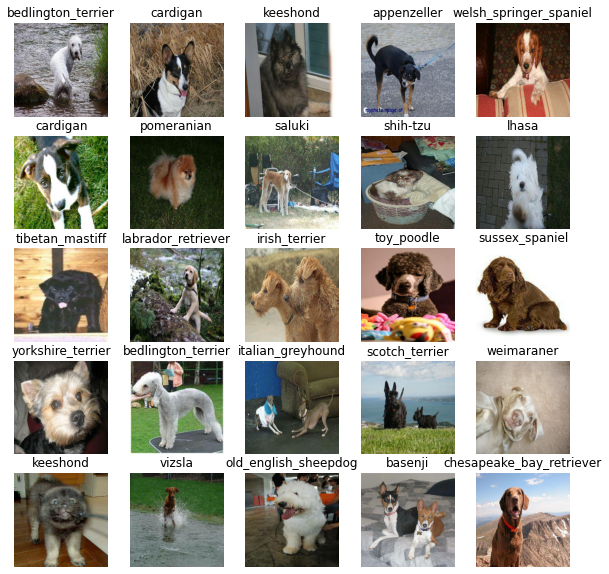

In [40]:
# Now visulize training data in training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels);

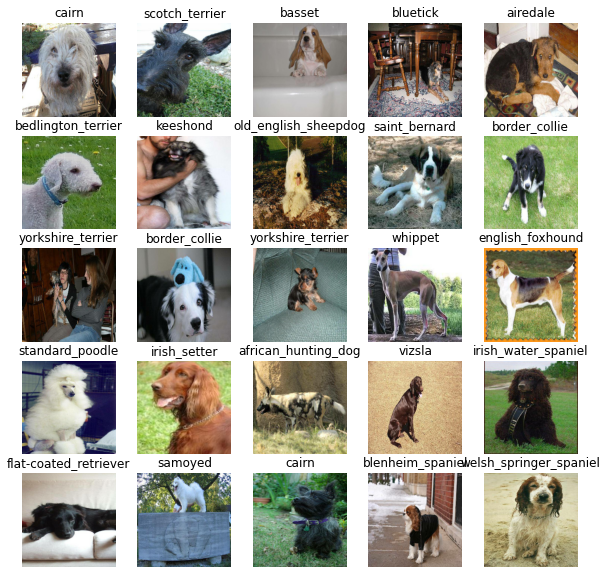

In [41]:
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model
Before we build a model, there are a few things we need to define:

  1. The input shape (our images shape, in the form of Tensors) to our model.
  2. The output shape (image labels, in the form of Tensors) of our model.
  
    The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [42]:
IMG_SIZE

224

In [0]:
# SETUP INPUT SHAPE TO THE MODEL
INPUT_SHAPE =[None,IMG_SIZE,IMG_SIZE,3] # Batch, height, width, color channel(RGB)
# SETUP OUTPUT SHAPE TO THE MODEL
OUTPUT_SHAPE = len(unique_breed)
# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [44]:
INPUT_SHAPE

[None, 224, 224, 3]

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

1. Takes the input shape, output shape and the model we've chosen as parameters.
2. Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
3. Compiles the model (says it should be evaluated and improved).
4. Builds the model (tells the model the input shape it'll be getting).
5. Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [0]:
# Create a function that runs on Karas model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building Model With " + model_url)
  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [46]:
model = create_model()
model.summary()

Building Model With https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.
### TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
3. Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [0]:
# Load tensorboard notebook extension
%load_ext tensorboard

In [0]:
import datetime
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join(ipath + "/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [0]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=3)

### Training a model on subset of data
Train first 1000 images to make sure model is working

In [0]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

Let's create a function which trains a model.

  1. Create a model using create_model()
  2. Setup a TensorBoard callback using create_tensorboard_callback()
  3. Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
  4. Return the model

In [0]:
# Building a function to train and retun trained model
def train_model():
  # Create Model
  model = create_model()

  # Create TensorBoard Session everytime everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit a model to the data passing it the callback we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq =1,
            callbacks = [tensorboard,early_stopping])
  
  # Return the fitted model
  return model

In [52]:
# Fit model into data
model = train_model()

Building Model With https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 749s 30s/step - loss: 4.5102 - accuracy: 0.1138 - val_loss: 3.3071 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 5s 207ms/step - loss: 1.6356 - accuracy: 0.7013 - val_loss: 2.1438 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 5s 208ms/step - loss: 0.5822 - accuracy: 0.9237 - val_loss: 1.6944 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 5s 205ms/step - loss: 0.2645 - accuracy: 0.9875 - val_loss: 1.4774 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 5s 210ms/step - loss: 0.1495 - accuracy: 0.9975 - val_loss: 1.3959 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 5s 210ms/step - loss: 0.1022 - accuracy: 0.9987 - val_loss: 1.3530 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================]

### Checking the TensorBoard logs

In [53]:
ipath

'drive/My Drive/Colab Notebooks/dog-vision'

In [0]:
# %tensorboard --logdir drive/My\ Drive/Colab\ Notebooks/dog-vision/logs

## Making and evaluating model using a trained model

In [55]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [56]:
# Make prediction on trained data which were not used for training
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 130ms/step


array([[1.9481132e-03, 2.5791722e-05, 4.7175531e-04, ..., 2.2275038e-03,
        9.9705048e-06, 2.8121816e-03],
       [3.6026533e-03, 1.8449109e-04, 1.8544879e-02, ..., 4.8527792e-05,
        4.5942343e-03, 2.4993933e-04],
       [7.2754519e-06, 7.4242802e-05, 1.9849798e-05, ..., 1.7562246e-05,
        2.2025617e-05, 2.4424007e-03],
       ...,
       [7.4487349e-07, 1.1207653e-05, 2.9458733e-05, ..., 1.6858039e-05,
        1.0499703e-04, 5.9339283e-05],
       [6.3602389e-03, 4.2039374e-05, 7.3905761e-04, ..., 1.3936678e-04,
        3.4939319e-05, 1.5962875e-02],
       [8.3092850e-04, 1.1302282e-04, 5.7221187e-04, ..., 1.7872246e-03,
        4.6023747e-04, 1.1685212e-04]], dtype=float32)

In [57]:
predictions[0]

array([1.94811320e-03, 2.57917218e-05, 4.71755309e-04, 1.06733896e-04,
       2.71619880e-04, 7.80247956e-06, 1.12173222e-02, 2.17088873e-05,
       6.00121712e-05, 1.05041669e-04, 3.29027302e-04, 7.86420351e-05,
       5.36424595e-05, 4.22599333e-05, 4.29395150e-04, 1.37421113e-04,
       2.72791309e-04, 4.54338640e-01, 1.49744255e-05, 6.83105009e-06,
       3.29725415e-04, 6.04250272e-05, 1.43960551e-05, 4.59873554e-04,
       1.42384069e-05, 1.87240061e-04, 5.98021075e-02, 2.65277595e-05,
       2.41257512e-04, 3.90664034e-04, 2.58990767e-04, 5.17451263e-04,
       4.93982923e-04, 6.70461441e-06, 6.67486820e-05, 2.71762535e-03,
       5.72198724e-06, 6.77791017e-04, 3.72468421e-05, 5.03779629e-05,
       3.58073710e-04, 1.92320817e-06, 3.08202871e-05, 6.90664747e-05,
       6.73020668e-06, 8.34434904e-05, 2.73137794e-05, 9.92180285e-05,
       3.98621371e-04, 1.12457383e-04, 1.88575461e-04, 3.76954558e-05,
       1.06871506e-04, 5.32629456e-05, 3.96198011e-05, 1.94492750e-05,
      

In [58]:
# First predictions
index = 39
print(f"Max Value(Probability of Predictions) is: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max Index:{np.argmax(predictions[index])}")
print(f"Prediction Label:{unique_breed[np.argmax(predictions[index])]}")

Max Value(Probability of Predictions) is: 0.3581421673297882
Sum: 1.0000001192092896
Max Index:66
Prediction Label:kuvasz


In [59]:
unique_breed[67]

'labrador_retriever'

In [60]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
def get_pred_label(prediction_probabilities):
  return unique_breed[np.argmax(prediction_probabilities)]

In [62]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  
  return images,labels

# Unbatchify the image data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get get:

  1. Prediction labels
  2. Validation labels (truth labels)
  3. Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:

  1. Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
  2. Convert the prediction probabilities to a predicted label. ✅
  3. Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [0]:
def plot_pred(prediction_probabilities,labels,images,n=39):
  pred_prob, true_label, image = prediction_probabilities[n],labels[n],images[n]

  #Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot images and remove ticks
  plt.imshow(image)
  plt.xticks = ([])
  plt.yticks = ([])

  # Chane color if prediction is true
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Change the title to be predicted, probability of predictions and truth label
  plt.title ("{} {:2.0f}% {}" .format(pred_label, np.max(pred_prob)*100,true_label),color=color)


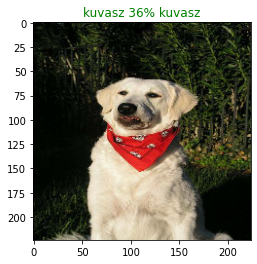

In [64]:
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=39)

In [0]:
def prod_pred_conf(prediction_probabilies,labels,n=1):
  pred_prob, true_label = prediction_probabilies[n], labels[n]

  # Get the predict label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1] # -1 for decending order and -10 for top 10
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup a plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")

  if np.isin(true_label ,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color="green"
  else:
    pass


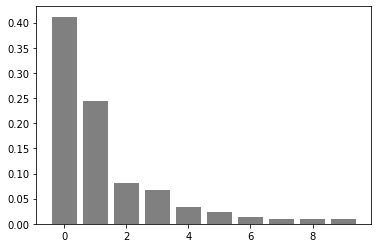

In [66]:
prod_pred_conf(prediction_probabilies=predictions,
               labels = val_labels,
               n=9)

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass
  

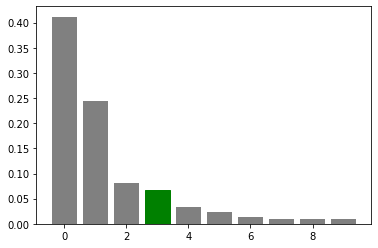

In [68]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

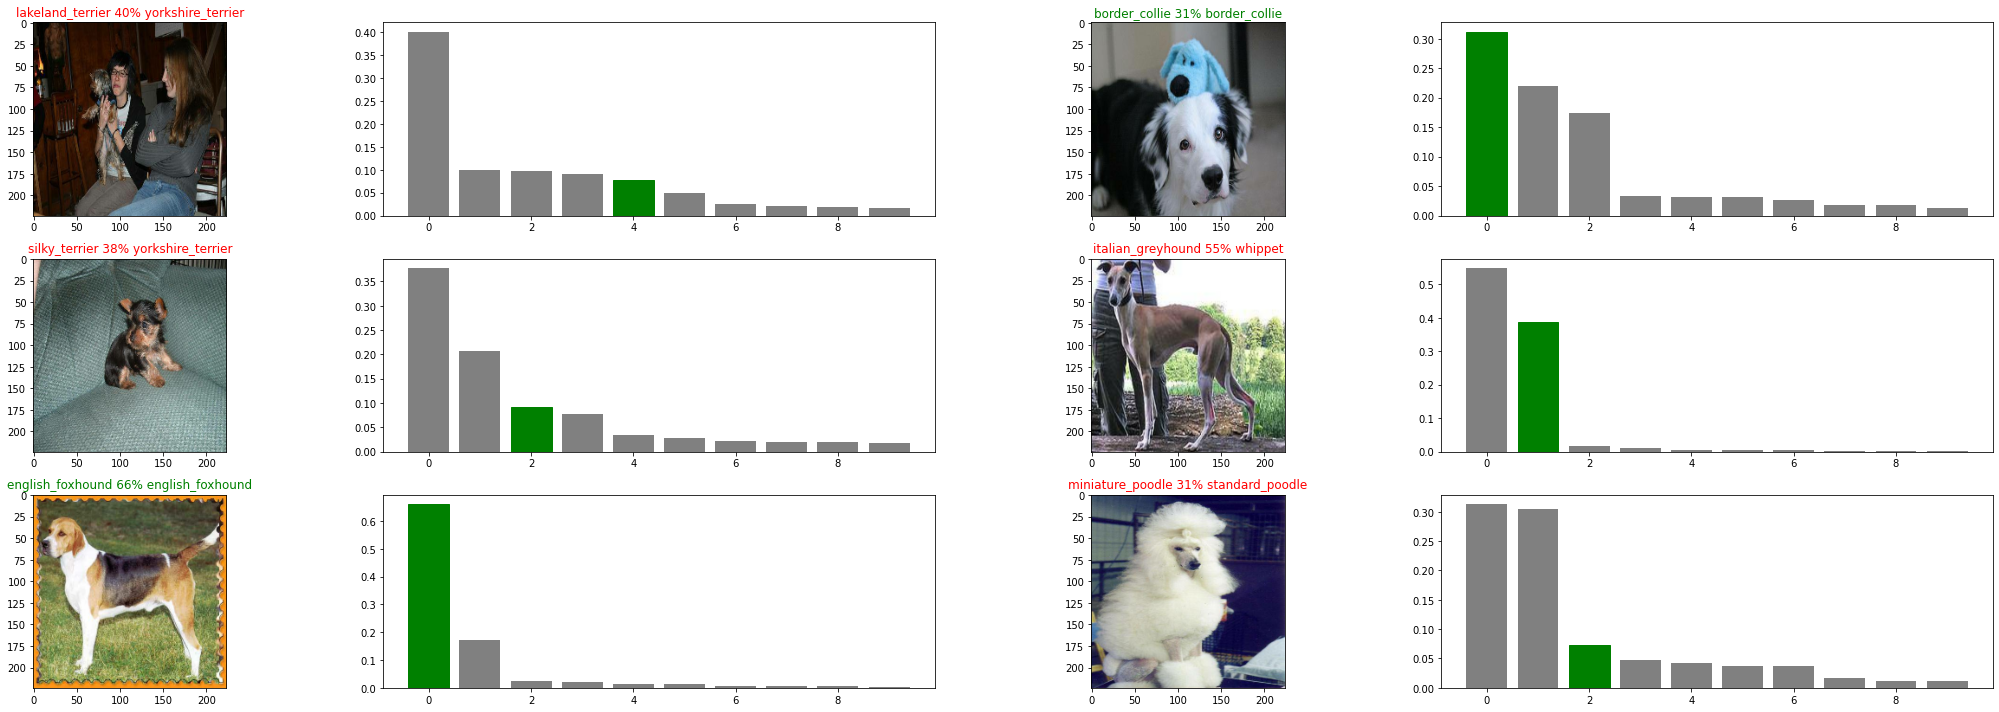

In [69]:
# Check out predictions and their different values 
i_multiplier = 10
num_rows = 3
num_columns = 2
num_images = num_rows*num_columns
plt.figure(figsize=(10*num_rows,5*num_columns))
for i in range(num_images):
  plt.subplot(num_rows,2*num_columns,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels = val_labels,
            images = val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_columns,2*i+2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show();

## Saving and reloading model

In [0]:
# Function to save a model
def save_model(model,suffix=None):
  model_dir = os.path.join("drive/My Drive/Colab Notebooks/dog-vision/model",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir + "-" + suffix + ".h5"

  print(f"Saving model to: {model_path}")
  model.save(model_path)

  return model_path

In [0]:
# Create a function to load trained model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [72]:
# Save our model trained on 1000 images
save_model(model,suffix="1000_trained_images")

Saving model to: drive/My Drive/Colab Notebooks/dog-vision/model/20200607-13011591534914-1000_trained_images.h5


'drive/My Drive/Colab Notebooks/dog-vision/model/20200607-13011591534914-1000_trained_images.h5'

In [73]:
# Load our model
loaded_1000_images_model = load_model("drive/My Drive/Colab Notebooks/dog-vision/model/20200607-10391591526342-1000_trained_images.h5")

Loading saved model from: drive/My Drive/Colab Notebooks/dog-vision/model/20200607-10391591526342-1000_trained_images.h5


In [74]:
# Evaluate pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 118ms/step - loss: 1.2316 - accuracy: 0.6700


[1.231600284576416, 0.6700000166893005]

In [75]:
# Evaluate the loaded model
loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 1s 122ms/step - loss: 1.3681 - accuracy: 0.6600


[1.3681405782699585, 0.6600000262260437]

## Training Big Dog Model on Full Data 🐶

In [76]:
len(X), len(y)

(10222, 10222)

In [77]:
# Create a data batch with full dataset
full_data = create_data_batches(X,y)

Creating training data batches...


In [78]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [79]:
# Create a model for full model
full_model = create_model()

Building Model With https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

**Note** The code below will take upto 1 hour to run

In [0]:
# Fit the full model to the full data
full_model.fit(full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
265/320 [=======================>......] - ETA: 23:00 - loss: 1.4487 - accuracy: 0.6507

In [0]:
save_model(full_model,suffix="full-model-dataset")

In [0]:
# full_loaded_model = load_model()

## Making predictions on test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

  * Get the test image filenames. ✅
  * Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
  *Make a predictions array by passing the test batches to the predict() method called on our model.